In [147]:
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as Im
import scipy.optimize as opt

%matplotlib inline

In [148]:
data = pd.read_excel("./data/Book3.xlsx") #Read the data

l = 0.85
dl = 0.003

omega_pred = np.sqrt(9.81/l)
d_pred = 0.5*np.sqrt(9.81/l**3)*dl

theta_meas = np.array([0.1655,0.2054,0.2331,0.2130,0.1895,0.2265,0.2183])
dtheta_meas = np.array([0.0002,0.0003,0.0003,0.0003,0.0002,0.0002,0.0003])

omega_meas = np.array([3.3901,3.3877,3.3828,3.3861,3.3886,3.3847,3.3863])
d_meas = np.array([0.0003,0.0003,0.0002,0.0003,0.0002,0.0002,0.0003])

sig = []

for n in range(omega_meas.size):
    sig.append((omega_pred - omega_meas[n])/np.sqrt(d_pred**2 + d_meas[n]**2))

sig

[1.1879333912029875,
 1.5877591716895445,
 2.405739917398786,
 1.8543096920139897,
 1.4388231631381103,
 2.088991325485793,
 1.8209908769734433]

In [149]:
data

,angle (deg),angle (rad),measured angle (rad),dAngle (rad),measured angular frequency (rad/s),dfrequency,predicted angular frequency,dpred,discrepancy,Unnamed: 9,l,dl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,0.3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.5,0.183260,0.1655,0.0002,3.3901,0.0003,3.397231,0.005995,1.187933,NaN,NaN,NaN
4,12.0,0.209440,0.2054,0.0003,3.3877,0.0003,3.397231,0.005995,1.587759,NaN,NaN,NaN
5,13.5,0.235619,0.2331,0.0003,3.3828,0.0002,3.397231,0.005995,2.405740,NaN,NaN,NaN
6,12.5,0.218166,0.2130,0.0003,3.3861,0.0003,3.397231,0.005995,1.854310,NaN,NaN,NaN
7,NaN,NaN,0.1895,0.0002,3.3886,0.0002,3.397231,0.005995,1.438823,NaN,NaN,NaN
8,NaN,NaN,0.2265,0.0002,3.3847,0.0002,3.397231,0.005995,2.088991,NaN,NaN,NaN
9,NaN,NaN,0.2183,0.0003,3.3863,0.0003,3.397231,0.005995,1.820991,NaN,NaN,NaN


In [150]:

theta_fit = np.array([0.2130,0.2183,0.2265,0.2331])
dfit = np.array([0.0003,0.0003,0.0002,0.0003])
sig_fit = np.array([1.8543096920139897,1.8209908769734433,2.088991325485793,2.405739917398786])

def linreg(x,A,B): #Curve function
    y = A + B*x 
    return y

p, cov = opt.curve_fit(linreg, #Perform the curve fit
                       theta_fit, 
                       sig_fit,
                       sigma=dfit,
                       absolute_sigma = True)

fitA = p[0]
fitdA = np.sqrt(cov[0,0])

fitB = p[1]
fitdB = np.sqrt(cov[1,1])

print("Linear Fit Results for x-axis")
print("y-intercept: %1.4f +/- %1.4f m" % (fitA, fitdA))
print("slope: %1.2f +/- %1.2f m/s" % (fitB, fitdB)) # Linear regression for the observed vs predicted plot

Linear Fit Results for x-axis
y-intercept: -4.1472 +/- 0.0042 m
slope: 27.73 +/- 0.02 m/s


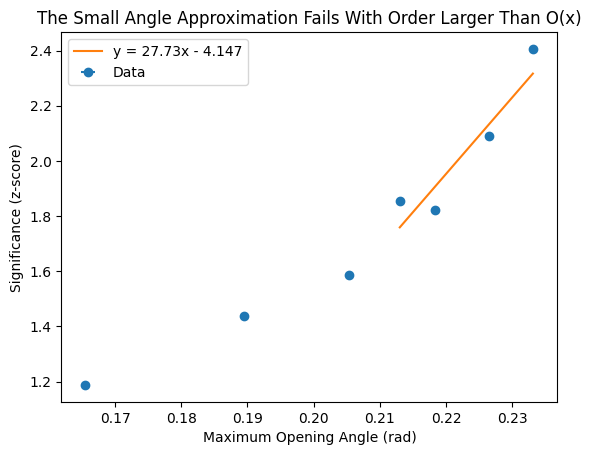

In [151]:
plot1 = plt.errorbar(theta_meas,sig,xerr=dtheta_meas,fmt='o',label ="Data")
plot2 = plt.plot(theta_fit, 
        linreg(theta_fit,fitA,fitB), 
        label="y = 27.73x - 4.147")
plt.xlabel("Maximum Opening Angle (rad)")
plt.ylabel("Significance (z-score)")
plt.legend()
plt.title("The Small Angle Approximation Fails With Order Larger Than O(x)")
plt.show(plot1,plot2)

In [152]:
fail = (1.96 - fitA)/fitB
fail = np.degrees(fail)
dfail = np.degrees(np.sqrt((fitdA/fitB)**2 + ((1.96-fitA)*fitdB/(fitB)**2)**2))
dfail

0.012317987741138391

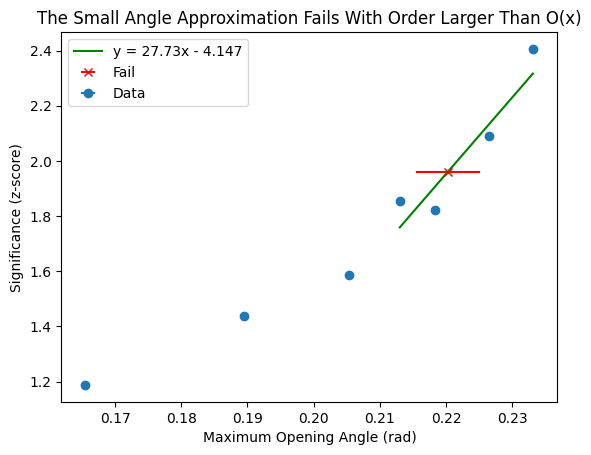

In [153]:
dx = ((2.088991325485793 - fitA)/fitB-(1.8209908769734433 - fitA)/fitB)/2

plot3 = plt.errorbar(np.radians(fail),1.96,xerr=dx,fmt='x',label='Fail',color='red')
plot1 = plt.errorbar(theta_meas,sig,xerr=dtheta_meas,fmt='o',label ="Data")
plot2 = plt.plot(theta_fit, 
        linreg(theta_fit,fitA,fitB), 
        label="y = 27.73x - 4.147", color = 'green')
plt.xlabel("Maximum Opening Angle (rad)")
plt.ylabel("Significance (z-score)")
plt.legend()
plt.title("The Small Angle Approximation Fails With Order Larger Than O(x)")
plt.show()

In [154]:
dx = np.degrees(dx)
dx

0.27688684062591623